# Question 1 

Design and develop a simple VGG-like baseline convolutional neural network architecture (as per the structure illustrated in Fig. 2) to classify our two classes (Cardiomegaly [CARDI] and No Finding [NF]). Your design should use both data augmentation and dropout and use a CNN input image size of (224,224).

##### Basic CNN structure 
- conv2d_1 (Conv2D)
- max_pooling2d_1
- conv2d_2 (Conv2D)
- max_pooling2d_2
- conv2d_3 (Conv2D)
- max_pooling2d_3
- flatten_1
- dropout_1
- dense_1
- dense_2

In [7]:
import os
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense,Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import time

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Load data

In [159]:
# import our data 
base_dir = 'data_images/resized_224/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [160]:
print(train_dir)
print(validation_dir)
print(test_dir)


data_images/resized_224/train
data_images/resized_224/validation
data_images/resized_224/test


#### Preprocessing data

In [161]:
# Using ImageDataGenerator to read images from directories
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, width_shift_range=0.1,
height_shift_range=0.1) # all images will be rescaled by 1./255
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


# setup generators 
train_generator = train_datagen.flow_from_directory(
    train_dir, # this is the target directory
    target_size=(224, 224), # all images will be resized to 224X224
    batch_size=20,
    class_mode='binary',
color_mode='rgb') # since we use binary_crossentropy loss, we need binary labels

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary',
color_mode='rgb')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary',
color_mode='rgb')

Found 1600 images belonging to 2 classes.
Found 384 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


#### Model architecture

In [162]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(224,224,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
# The dropout rate is set to 20%, meaning one in 5 inputs will be randomly excluded from each update cycle.
cnn.add(Dropout(0.2))
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(1,activation='sigmoid')) #sigmoid used for binary classification while softmax for multiclass classifications
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_262 (Conv2D)          (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_113 (MaxPoolin (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_263 (Conv2D)          (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_114 (MaxPoolin (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_264 (Conv2D)          (None, 56, 56, 32)        9248      
_________________________________________________________________
max_pooling2d_115 (MaxPoolin (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 25088)             0         
__________

#### Compile the model

In [163]:
# before we train our model we need to compile it.
# we will use adam as optimizer
# we will use binary cross entropy as loss function because our output is going to be 1 
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
step_train=train_generator.n//train_generator.batch_size
step_valid=validation_generator.n//validation_generator.batch_size
print(step_train)
print(step_valid)

80
19


#### Train the model

In [164]:
start = time.time()
history_cnn = cnn.fit_generator(train_generator, steps_per_epoch=80, epochs=30, validation_data=validation_generator, validation_steps=19)
end = time.time()
fit_time = (end - start)
print(fit_time)

Epoch 1/30
80/80 [==============================] - 73s 914ms/step - loss: 0.7040 - acc: 0.5100 - val_loss: 0.6890 - val_acc: 0.6000
Epoch 2/30
80/80 [==============================] - 66s 831ms/step - loss: 0.6845 - acc: 0.5469 - val_loss: 0.7494 - val_acc: 0.5220
Epoch 3/30
80/80 [==============================] - 66s 828ms/step - loss: 0.6788 - acc: 0.5781 - val_loss: 0.6655 - val_acc: 0.5907
Epoch 4/30
80/80 [==============================] - 66s 824ms/step - loss: 0.6523 - acc: 0.6094 - val_loss: 0.6400 - val_acc: 0.6319
Epoch 5/30
80/80 [==============================] - 66s 828ms/step - loss: 0.6459 - acc: 0.6231 - val_loss: 0.6516 - val_acc: 0.6181
Epoch 6/30
80/80 [==============================] - 66s 828ms/step - loss: 0.6474 - acc: 0.6388 - val_loss: 0.6230 - val_acc: 0.6346
Epoch 7/30
80/80 [==============================] - 66s 825ms/step - loss: 0.6397 - acc: 0.6394 - val_loss: 0.6312 - val_acc: 0.6484
Epoch 8/30
80/80 [==============================] - 67s 831ms/step - 

In [165]:
# Saving our model
cnn.save('cardiomegaly_prediction_basic_final.h5')

#### Test the model

In [166]:
# finally evaluate this model on the test data
start = time.time()
score = cnn.evaluate_generator(test_generator, steps=200)
end = time.time()
pred_time = (end - start)
print(pred_time)

50.48141598701477


In [167]:
# Accuracy of our data is 71%
score

[0.5915167260169983, 0.7099999997019768]

#### Performance visualization

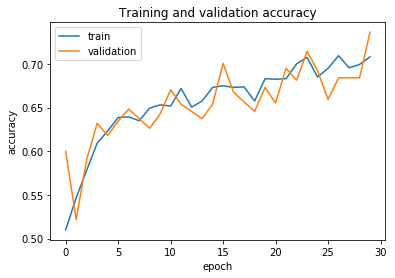

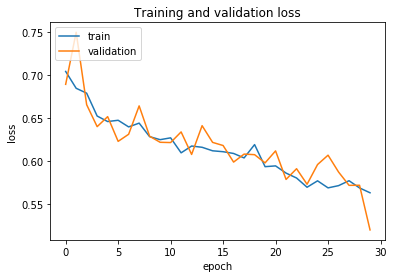

In [168]:
# Plot Training History.
# summarize history for accuracy
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# save image to disk
plt.savefig('vgg16_basic_accuracy', dpi=250)
plt.show()

# summarize history for loss
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# save image to disk
plt.savefig('vgg16_basic_loss', dpi=250)
plt.show()

In [169]:
print('Fit time: {} / Predict time: {} '.format(
    round(fit_time, 3), round(pred_time, 3)))

Fit time: 6413.495 / Predict time: 50.481 


# Part B

Implement a full VGG16 convolutional neural network architecture to classify our two
classes (Cardiomegaly [CARDI] and No Finding [NF]). Your design should use both data
augmentation and dropout and use a CNN input image size of (224,224). Compare the
results to those found in Q1(a) in terms of overall accuracy and computational
efficiency

In [275]:
import os
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense,Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import optimizers
from keras.optimizers import SGD
from keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import VGG16
import time

#### Load data

In [264]:
# import our data 
base_dir = 'data_images/resized_224/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

#### Preprocessing and Data Augmentation 
Taking image in training data set and manipulate them to create many altered versions of the same image
This, not only provides more images to train on but also helps our model in adapting to a wider variety of image alterations such as reflection. 

In [265]:
# Using ImageDataGenerator to read images from directories
train_datagen = ImageDataGenerator(
rescale=1./255,
horizontal_flip=True, width_shift_range=0.1,
height_shift_range=0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)


# setup generators 
train_generator = train_datagen.flow_from_directory(
    train_dir, # this is the target directory
    target_size=(224, 224), 
    batch_size=20,
    class_mode='binary',
color_mode='rgb',) # since we use binary_crossentropy loss, we need binary labels

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary',
color_mode='rgb')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary',
color_mode='rgb')

Found 1600 images belonging to 2 classes.
Found 384 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


#### We will now create our model copying the VGG16 architecture while adding a dropout layer.

Dropout explanation: The effect of dropout is to prevent overfitting. 
Forces the network to learn a redundant representation of the data so itis killing each neuron in a layer with probability p. The probability p is commonly set to 0.5 meaning that half of the neurons are dropped our during training and the model is forced to learn more general and more robust patterns. 

In [278]:
    vgg = Sequential()

    vgg.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(224,224,3), padding='same'))
    vgg.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
    vgg.add(MaxPooling2D((2,2), strides=(2,2)))
    vgg.add(Dropout(0.25))

    vgg.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
    vgg.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
    vgg.add(MaxPooling2D((2,2), strides=(2,2)))
    vgg.add(Dropout(0.25))


    vgg.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
    vgg.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
    vgg.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
    vgg.add(MaxPooling2D((2,2), strides=(2,2)))
    vgg.add(Dropout(0.25))


    vgg.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
    vgg.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
    vgg.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
    vgg.add(MaxPooling2D((2,2), strides=(2,2)))
    vgg.add(Dropout(0.25))

    vgg.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
    vgg.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
    vgg.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
    vgg.add(MaxPooling2D((2,2), strides=(2,2)))
    vgg.add(Dropout(0.25))



    vgg.add(Flatten())
    vgg.add(Dense(4096, activation='relu'))
    vgg.add(Dense(4096, activation='relu'))
    vgg.add(Dropout(0.50))
    vgg.add(Dense(1, activation='sigmoid'))
    
# Print model summary
print(vgg.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_479 (Conv2D)          (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_480 (Conv2D)          (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_134 (MaxPoolin (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_76 (Dropout)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_481 (Conv2D)          (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_482 (Conv2D)          (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_135 (MaxPoolin (None, 56, 56, 128)       0         
__________

#### Compile the model

In [279]:
sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

In [280]:
vgg.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])


In [281]:
step_train=train_generator.n//train_generator.batch_size
step_valid=validation_generator.n//validation_generator.batch_size
print(step_train)
print(step_valid)

80
19


#### Fit the model

In [282]:
# fit the model
start = time.time()
history_vgg = vgg.fit_generator(
        train_generator,
        steps_per_epoch=80,
        epochs=15,
        validation_data=validation_generator,
        validation_steps=19)
end = time.time()
fit_time = (end - start)
print(fit_time)

Epoch 1/15
80/80 [==============================] - 1457s 18s/step - loss: 0.6931 - acc: 0.5106 - val_loss: 0.6931 - val_acc: 0.5165
Epoch 2/15
80/80 [==============================] - 1396s 17s/step - loss: 0.6932 - acc: 0.4956 - val_loss: 0.6932 - val_acc: 0.4643
Epoch 3/15
80/80 [==============================] - 2849s 36s/step - loss: 0.6932 - acc: 0.4875 - val_loss: 0.6931 - val_acc: 0.5247
Epoch 4/15
80/80 [==============================] - 1357s 17s/step - loss: 0.6930 - acc: 0.5138 - val_loss: 0.6931 - val_acc: 0.5027
Epoch 5/15
80/80 [==============================] - 4435s 55s/step - loss: 0.6931 - acc: 0.5075 - val_loss: 0.6931 - val_acc: 0.4945
Epoch 6/15
80/80 [==============================] - 1325s 17s/step - loss: 0.6930 - acc: 0.5056 - val_loss: 0.6931 - val_acc: 0.5165
Epoch 7/15
80/80 [==============================] - 1391s 17s/step - loss: 0.6932 - acc: 0.4931 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 8/15
80/80 [==============================] - 1338s 17s/step - 

In [283]:
# Saving our model
vgg.save('cardiomegaly_prediction_last_vgg.h5')

#### Test the model

In [284]:
# finally evaluate this model on the test data
start = time.time()
score = vgg.evaluate_generator(test_generator, steps=200)
end = time.time()
pred_time = (end - start)
print(pred_time)

2258.398741006851


In [285]:
# Accuracy of our data is 50%
score

[0.6930616262555123, 0.5000000031292439]

#### Visualize model performances

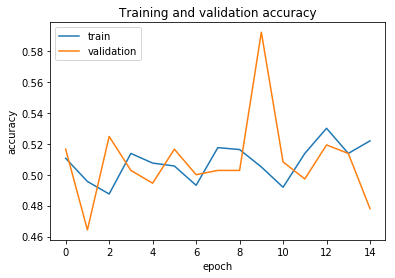

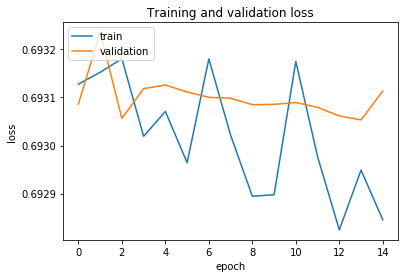

In [286]:
# Plot Training History.
# summarize history for accuracy
plt.plot(history_vgg.history['acc'])
plt.plot(history_vgg.history['val_acc'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

# summarize history for loss
plt.plot(history_vgg.history['loss'])
plt.plot(history_vgg.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# plt.savefig('vgg16_basic_loss', dpi=250)
plt.show()

In [287]:
print('Fit time: {} / Predict time: {} '.format(
    round(fit_time, 3), round(pred_time, 3)))

Fit time: 80065.957 / Predict time: 2258.399 


# Question 2

Implement an InceptionV3 (InceptionV3 requires input image size: 299x299) based fine-tuning based transfer learning CNN architecture to optimise the cardiomegaly classification task. During fine-tuning, only train the top 2
Inception blocks (mixed 8 and 9: each block = 31 layers). 
Freeze the first (311-2*31) = 249 layers and unfreeze the rest.
Compare the results to those found in Q1(b) in terms of overall accuracy and computational efficiency

In [1]:
import os
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense,Dropout
from keras.models import Sequential
from keras.applications import inception_v3
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import time

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Load data

In [2]:
# import our data 
base_dir = 'data_images/resized_299/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [3]:
# Load Keras' inceptionV3 model that was pre-trained against the ImageNet database. This is to be used as feature extractor
inception = inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(299,299,3))


In [4]:
print (inception.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

#### Add fully connected layer on inception model 

In [5]:
# Adding a densely-connected classifier on top of the inception base
model = models.Sequential()
model.add(inception)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
# freezing weights trained on image net classifier
inception.trainable = False

#### Preprocess and augment data

In [7]:
# Preparing for generators 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True, 
    width_shift_range=0.1,
    height_shift_range=0.1)

# Note that the validation/test data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

#Generators
train_generator = train_datagen.flow_from_directory(
    train_dir, # This is the target directory
    target_size=(299, 299), # All images will be resized to 150x150
    batch_size=20,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(299, 299),
    batch_size=20,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=20,
    class_mode='binary')

Found 1600 images belonging to 2 classes.
Found 384 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


#### Compile model training fully connected layer only

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [9]:
start = time.time()

history_inception_freezed = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    verbose=2,
    validation_data=validation_generator,
    validation_steps=19)

end = time.time()
fit_time = (end - start)
print(fit_time)

Epoch 1/15
 - 349s - loss: 7.9554 - acc: 0.5020 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/15
 - 338s - loss: 8.1961 - acc: 0.4915 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/15
 - 351s - loss: 7.9704 - acc: 0.5055 - val_loss: 7.9262 - val_acc: 0.5082
Epoch 4/15
 - 370s - loss: 8.0510 - acc: 0.5005 - val_loss: 8.1476 - val_acc: 0.4945
Epoch 5/15
 - 362s - loss: 7.9623 - acc: 0.5060 - val_loss: 7.9262 - val_acc: 0.5082
Epoch 6/15
 - 355s - loss: 8.2686 - acc: 0.4870 - val_loss: 8.1033 - val_acc: 0.4973
Epoch 7/15
 - 1130s - loss: 8.0472 - acc: 0.4950 - val_loss: 7.6646 - val_acc: 0.5192
Epoch 8/15
 - 344s - loss: 8.0350 - acc: 0.4960 - val_loss: 7.8398 - val_acc: 0.5082
Epoch 9/15
 - 47531s - loss: 7.9871 - acc: 0.4990 - val_loss: 8.2340 - val_acc: 0.4835
Epoch 10/15
 - 8669s - loss: 7.9632 - acc: 0.5005 - val_loss: 8.1902 - val_acc: 0.4863
Epoch 11/15
 - 351s - loss: 8.0190 - acc: 0.4970 - val_loss: 7.7522 - val_acc: 0.5137
Epoch 12/15
 - 353s - loss: 7.9154 - acc: 0.5035 - val_loss

#### Fine Tuning 

In [10]:
# unfreeze our inception base model
inception.trainable = True

# Fine-tune the last 2 convolutional layers, which means that all layers upto
# mixed7 should be frozen
# Layers mixed8 and mixed9 are trainable.

set_trainable = False
for layer in inception.layers:
    if layer.name == 'mixed8' or layer.name == 'mixed9':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [11]:
step_train=train_generator.n//train_generator.batch_size
step_valid=validation_generator.n//validation_generator.batch_size
print(step_train)
print(step_valid)

80
19


#### Compile fine tuned model 

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

#### Train fine tuned model

In [13]:
start = time.time()

history_inception_freezed = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    verbose=2,
    validation_data=validation_generator,
    validation_steps=19)

end = time.time()
fit_time = (end - start)
print(fit_time)

Epoch 1/15
 - 435s - loss: 7.9154 - acc: 0.5035 - val_loss: 8.2340 - val_acc: 0.4835
Epoch 2/15
 - 440s - loss: 7.8516 - acc: 0.5075 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 3/15
 - 432s - loss: 8.2183 - acc: 0.4845 - val_loss: 7.7960 - val_acc: 0.5110
Epoch 4/15
 - 407s - loss: 7.9632 - acc: 0.5005 - val_loss: 8.6282 - val_acc: 0.4588
Epoch 5/15
 - 15676s - loss: 7.8676 - acc: 0.5065 - val_loss: 7.4894 - val_acc: 0.5302
Epoch 6/15
 - 411s - loss: 7.8437 - acc: 0.5080 - val_loss: 7.9274 - val_acc: 0.5027
Epoch 7/15
 - 18134s - loss: 7.9951 - acc: 0.4985 - val_loss: 8.0588 - val_acc: 0.4945
Epoch 8/15
 - 29801s - loss: 8.1147 - acc: 0.4910 - val_loss: 7.7084 - val_acc: 0.5165
Epoch 9/15
 - 427s - loss: 7.9553 - acc: 0.5010 - val_loss: 8.1902 - val_acc: 0.4863
Epoch 10/15
 - 434s - loss: 7.9792 - acc: 0.4995 - val_loss: 7.7960 - val_acc: 0.5110
Epoch 11/15
 - 423s - loss: 7.8915 - acc: 0.5050 - val_loss: 8.1902 - val_acc: 0.4863
Epoch 12/15
 - 425s - loss: 7.9234 - acc: 0.5030 - val_lo

#### Test the model 

In [21]:
# finally evaluate this model on the test data
start = time.time()
results = model.evaluate_generator(test_generator, steps=10)
end = time.time()
pred_time = (end - start)


83110.55055809021


In [24]:
print(pred_time)

23.990023851394653


In [15]:
# Saving our model
model.save('inception_base_fine_tuning_final.h5')

In [16]:
print('Final test accuracy:', (results[1]*100.0))

Final test accuracy: 49.999999701976776


#### Visualize model performances 

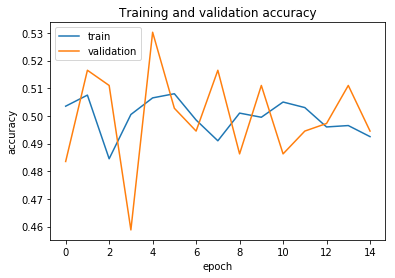

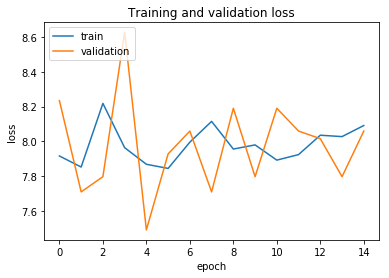

In [23]:
# Plot Training History.
# summarize history for accuracy
plt.plot(history_inception_freezed.history['acc'])
plt.plot(history_inception_freezed.history['val_acc'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

# summarize history for loss
plt.plot(history_inception_freezed.history['loss'])
plt.plot(history_inception_freezed.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# plt.savefig('vgg16_basic_loss', dpi=250)
plt.show()